# Tarea 5
## NLP

**Descripción**: para un texto en español, realizar tokenización, lematización y POS tagging con Stanza.

**Alumno**: Miguel Angel Soto Hernandez

# Stanza

In [75]:
!pip install stanza

In [76]:
%matplotlib inline
import stanza
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# librería para realizar peticiones web
import requests

# librería que nos permite extrar texto de un sitio web y convertirlo a string
from bs4 import BeautifulSoup

# descargando la libreía de stanza en español
stanza.download('es')

2021-03-20 00:49:32 INFO: Downloading default packages for language: es (Spanish)...
2021-03-20 00:49:33 INFO: File exists: /root/stanza_resources/es/default.zip.
2021-03-20 00:49:40 INFO: Finished downloading models and saved to /root/stanza_resources.


In [77]:
def buscarTexto(idioma, tema):
  # enlace para acceder al contenido de la Wikipedia
  response = requests.get(f'http://{idioma}.wikipedia.org/wiki/{tema}')

  # transformar el sitio web a texto plano
  soup = BeautifulSoup(response.text)

  # obtener el texto por párrafos
  parrafos = soup.find_all('p')

  # obtener solo el primer parrafo
  texto = parrafos[0].text
  return texto

# mostrar el texto con el que trabajaremos
texto_esp = buscarTexto('es', 'Google')
print(texto_esp)

Google, LLC es una compañía principal subsidiaria de la multinacional estadounidense Alphabet Inc., cuya especialización son los productos y servicios relacionados con Internet, software, dispositivos electrónicos y otras tecnologías. El principal producto de Google es el motor de búsqueda de contenido en Internet, del mismo nombre, aunque ofrece también otros productos y servicios como la suite ofimática Google Drive,  el correo electrónico llamado Gmail, sus servicios de mapas Google Maps, Google Street View y Google Earth, el sitio web de vídeos YouTube y otras utilidades web como Google Libros o Google Noticias, Google Chrome y la red social Google+ este último sacado fuera de línea en el primer cuatrimestre de 2019. Por otra parte, lidera el desarrollo del sistema operativo basado en Linux, Android, orientado a teléfonos inteligentes, tabletas, televisores y automóviles y en gafas de realidad aumentada, las Google Glass. Su eslogan es «Do the Right Thing» («Haz lo correcto»).[1]​


In [78]:
# definiendo el idioma y las funciones que se aplicarán
stanza_nlp = stanza.Pipeline('es', processors='tokenize, lemma, pos, mwt, ner')

# convirtiendo el texto a un formato reconocido por stanza
texto_stanza = stanza_nlp(texto_esp)

2021-03-20 00:49:40 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| ner       | conll02 |

2021-03-20 00:49:40 INFO: Use device: cpu
2021-03-20 00:49:40 INFO: Loading: tokenize
2021-03-20 00:49:40 INFO: Loading: mwt
2021-03-20 00:49:40 INFO: Loading: pos
2021-03-20 00:49:40 INFO: Loading: lemma
2021-03-20 00:49:40 INFO: Loading: ner
2021-03-20 00:49:42 INFO: Done loading processors!


In [79]:
# tokenización, lematización y POS tagging
print("{:12s}\t{:12s}\t{:6s}".format("Palabra", "Lematizacion", 
                                         "POS tagging"))

for i, oracion in enumerate(texto_stanza.sentences):
  print("[Oracion {}]".format(i + 1))
  for palabra in oracion.words:
    print("{:12s}\t{:12s}\t{:6s}".format(palabra.text, palabra.lemma, 
                                             palabra.pos))
  print("")

Palabra     	Lematizacion	POS tagging
[Oracion 1]
Google      	Google      	PROPN 
,           	,           	PUNCT 
LLC         	LLC         	PROPN 
es          	ser         	AUX   
una         	uno         	DET   
compañía    	compañía    	NOUN  
principal   	principal   	ADJ   
subsidiaria 	subsidiario 	ADJ   
de          	de          	ADP   
la          	el          	DET   
multinacional	multinacional	NOUN  
estadounidense	estadounidense	ADJ   
Alphabet    	Alphabet    	PROPN 
Inc.        	Inc.        	PROPN 
,           	,           	PUNCT 
cuya        	cuyo        	PRON  
especialización	especialización	NOUN  
son         	ser         	AUX   
los         	el          	DET   
productos   	producto    	NOUN  
y           	y           	CCONJ 
servicios   	servicio    	NOUN  
relacionados	relacionado 	ADJ   
con         	con         	ADP   
Internet    	Internet    	PROPN 
,           	,           	PUNCT 
software    	software    	NOUN  
,           	,           	PUNCT 
dispositivos	d

In [80]:
# named entity recognition
print("{:20s}\t{:12s}".format("Entidad", "Tipo"))
print(*["{:20s}\t{:12s}".format(entidad.text, entidad.type)
        for oracion in texto_stanza.sentences 
        for entidad in oracion.ents], sep='\n')

Entidad             	Tipo        
Google              	ORG         
LLC                 	ORG         
Alphabet Inc.       	ORG         
Internet            	MISC        
Google              	ORG         
Internet            	MISC        
Google Drive        	MISC        
Gmail               	ORG         
Google Maps         	ORG         
Google Street View  	ORG         
Google Earth        	ORG         
YouTube             	MISC        
Google Libros       	ORG         
Google Noticias     	ORG         
Google Chrome       	ORG         
Google+             	ORG         
Linux               	MISC        
Android             	MISC        
Google Glass        	MISC        
«Do the Right Thing»	MISC        
«Haz lo correcto»   	MISC        


**Nota**: Sólo los idiomas con tokens de varias palabras (MWT), como el alemán o el francés, requieren el MWTProcessor; otros idiomas, como el inglés o el chino, no admiten este procesador en el pipeline.

In [81]:
# multi word expression
print("{:20s}\t{:12s}".format("Token", "Palabras"))
for token in texto_stanza.sentences[0].tokens:
  print("{:20s}\t{:12s}".format(token.text, 
                        (", ".join([word.text for word in token.words]))))

Token               	Palabras    
Google              	Google      
,                   	,           
LLC                 	LLC         
es                  	es          
una                 	una         
compañía            	compañía    
principal           	principal   
subsidiaria         	subsidiaria 
de                  	de          
la                  	la          
multinacional       	multinacional
estadounidense      	estadounidense
Alphabet            	Alphabet    
Inc.                	Inc.        
,                   	,           
cuya                	cuya        
especialización     	especialización
son                 	son         
los                 	los         
productos           	productos   
y                   	y           
servicios           	servicios   
relacionados        	relacionados
con                 	con         
Internet            	Internet    
,                   	,           
software            	software    
,                   	,           
disposit

# FreeLing

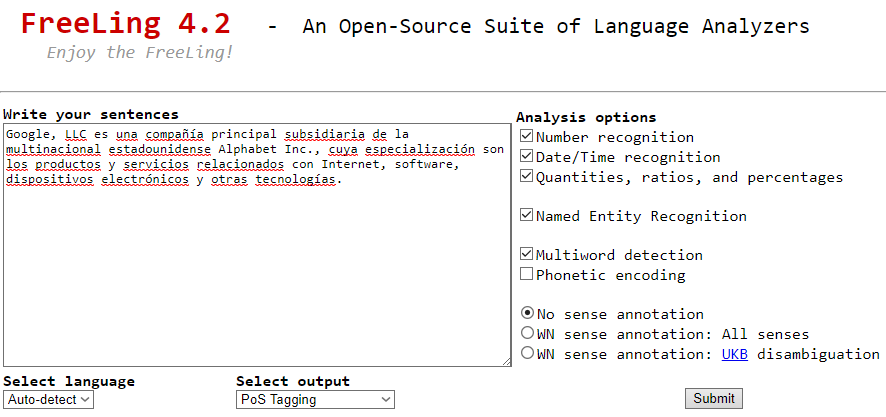

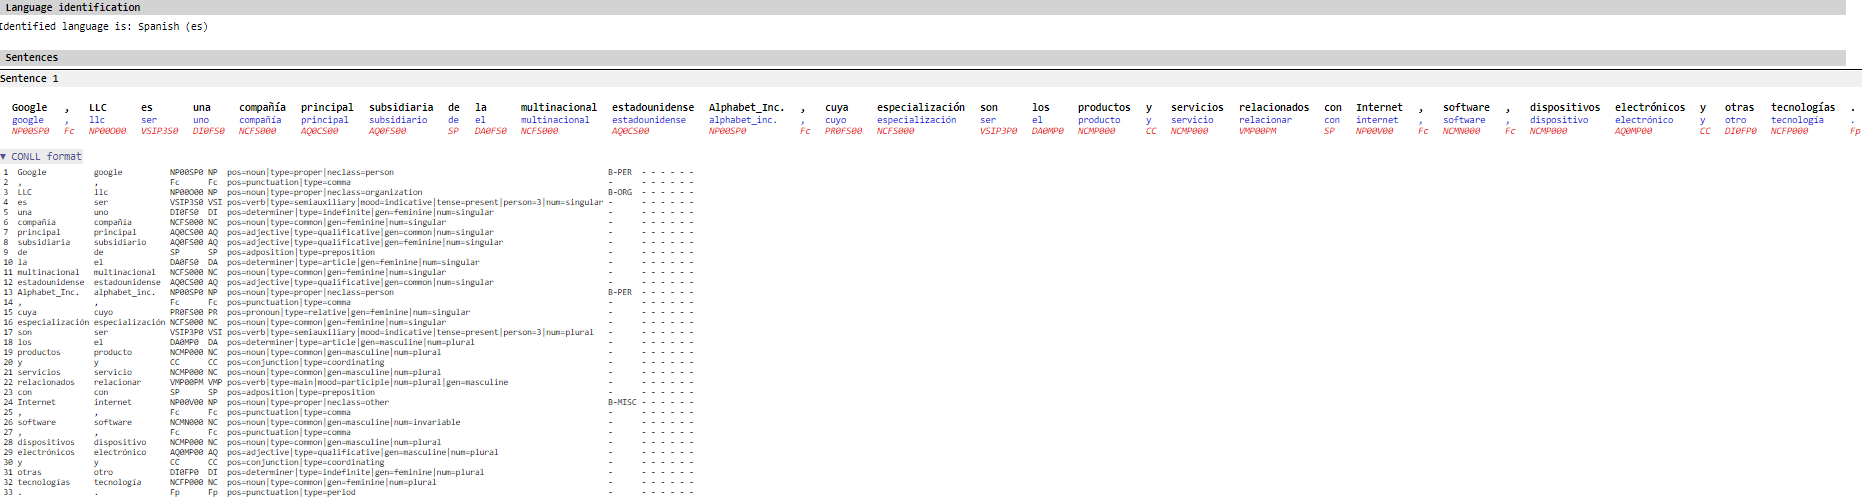